In [16]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [17]:
secretnumber ='1111'

In [18]:
circuit = QuantumCircuit(len(secretnumber)+1,len(secretnumber))
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii,len(secretnumber))
        
circuit.barrier()

circuit.h(range(len(secretnumber)))

circuit.barrier()

circuit.measure(range(len(secretnumber)),range(len(secretnumber)))


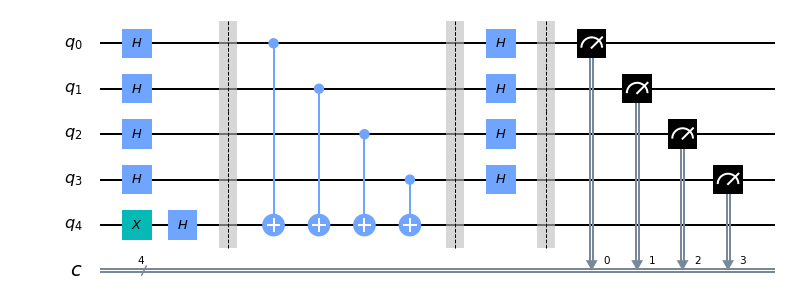

In [19]:
circuit.draw(output='mpl')

In [20]:
simulator = Aer.get_backend('qasm_simulator')
result=execute(circuit,backend=simulator,shots=1).result()
counts=result.get_counts()
print(counts)

{'1111': 1}


In [21]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-05-24 20:25:47,802: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [22]:
provider = IBMQ.get_provider('ibm-q')

In [23]:
qcomp=provider.get_backend('ibmq_16_melbourne')

In [24]:
job = execute(circuit, backend=qcomp)

In [25]:
from qiskit.tools.monitor import job_monitor

In [26]:
job_monitor(job)

Job Status: job has successfully run


In [27]:
result=job.result()

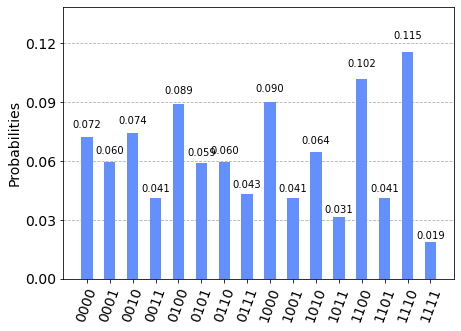

In [28]:
plot_histogram(result.get_counts(circuit))